You are expected to perform a simple classification problem - that of labelling emails as spam or non-spam, based on their content in terms of words. The dataset has been taken from UCI Machine learning repository (https://archive.ics.uci.edu/ml/datasets/Spambase). This must be achieved using two machine learning models based on Decision Trees.

In [18]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
#import dataset
df = pd.read_csv("spambase.data")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# PCA

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)


In [21]:
scaled_df=pd.DataFrame(data=scaled_data, columns= df.columns)

In [22]:
scaled_df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,...,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03
mean,5.675533e-16,4.707346e-16,5.322023e-15,1.121286e-15,-8.373133e-15,4.070584e-15,-5.820586e-15,6.240660e-16,2.196021e-15,-2.023140e-15,...,-3.645538e-15,4.249017e-16,-2.175977e-15,1.709683e-15,5.968100e-15,9.449144e-16,-3.005235e-16,9.823181e-16,1.234894e-15,-9.723478e-15
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.424753e-01,-1.649840e-01,-5.565759e-01,-4.690469e-02,-4.642614e-01,-3.503089e-01,-2.918283e-01,-2.625921e-01,-3.233412e-01,-3.714103e-01,...,-1.584710e-01,-5.143772e-01,-1.552149e-01,-3.297548e-01,-3.083916e-01,-1.030597e-01,-1.321116e-01,-2.625611e-01,-4.655586e-01,-8.061813e-01
25%,-3.424753e-01,-1.649840e-01,-5.565759e-01,-4.690469e-02,-4.642614e-01,-3.503089e-01,-2.918283e-01,-2.625921e-01,-3.233412e-01,-3.714103e-01,...,-1.584710e-01,-5.143772e-01,-1.552149e-01,-3.297548e-01,-3.083916e-01,-1.030597e-01,-1.135799e-01,-2.369058e-01,-4.094851e-01,-8.061813e-01
50%,-3.424753e-01,-1.649840e-01,-5.565759e-01,-4.690469e-02,-4.642614e-01,-3.503089e-01,-2.918283e-01,-2.625921e-01,-3.233412e-01,-3.714103e-01,...,-1.584710e-01,-2.739460e-01,-1.552149e-01,-3.297548e-01,-3.083916e-01,-1.030597e-01,-9.191234e-02,-1.907262e-01,-3.105320e-01,-8.061813e-01
75%,-3.424753e-01,-1.649840e-01,2.765673e-01,-4.690469e-02,1.045010e-01,-3.503089e-01,-2.918283e-01,-2.625921e-01,-3.233412e-01,-1.232505e-01,...,-1.584710e-01,1.810238e-01,-1.552149e-01,5.552688e-02,-9.690591e-02,-1.030597e-01,-4.685167e-02,-4.705634e-02,-2.975262e-02,1.240416e+00
max,1.452553e+01,1.089998e+01,9.560163e+00,3.063795e+01,1.440534e+01,2.112362e+01,1.828073e+01,2.743842e+01,1.855591e+01,2.782575e+01,...,1.785191e+01,3.555770e+01,3.715035e+01,3.948942e+01,2.410601e+01,4.608161e+01,3.458328e+01,5.098653e+01,2.565806e+01,1.240416e+00


PCA component starting


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
new_data = pca.fit_transform(scaled_df)

In [24]:
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
                            , columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [28]:
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.434491,2.224732,0.103055,-0.562272,-0.277888
1,-1.831416,4.828932,3.537356,-1.443412,0.717470
2,-0.992503,0.787556,-0.638611,-0.050060,-0.206312
3,-0.993397,0.786815,-0.640677,-0.050599,-0.206539
4,-0.649634,0.007984,-0.518058,0.449214,0.178433


In [30]:
X = principal_Df.iloc[:, :-1] # all attributes except last one
y = df.iloc[:, -1] # last column as target variable

# Doing train_test_split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Split the data considering the testing corpus as 30% and random state to 101.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [42]:
model.score(X_train, y_train)

0.9518633540372671

In [43]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Checking accuracy of testing dataset

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
predictions_test=model.predict(X_test)
print("DecisionTrees Test Accuracy: ",accuracy_score(y_test, predictions_test))

DecisionTrees Test Accuracy:  0.9478260869565217


# Checking accuracy of training dataset

In [46]:
predictions_train = model.predict(X_train)
print("DecisionTrees Train Accuracy: ", accuracy_score(y_train,predictions_train))

DecisionTrees Train Accuracy:  0.9518633540372671


# Visualizing final decision tree

In [48]:
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(model,filled=True)
plt.show()

# Evaluating dataset

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,predictions_test))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       822
           1       0.94      0.93      0.93       558

    accuracy                           0.95      1380
   macro avg       0.95      0.94      0.95      1380
weighted avg       0.95      0.95      0.95      1380



In [50]:
cm= confusion_matrix(y_test,predictions_test)
print(cm)

[[791  31]
 [ 41 517]]


Text(35.22222222222222, 0.5, 'Truth')

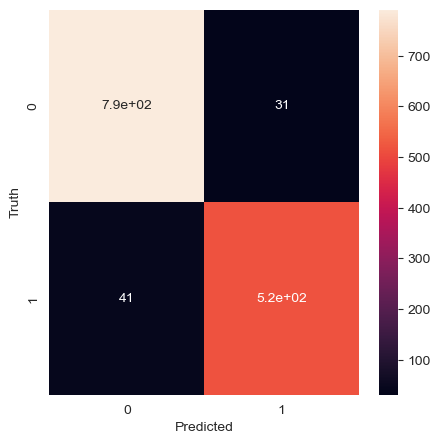

In [51]:
import seaborn as sn

plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")